# Query Expansion

In [15]:
import os

# Load the secrets file
current_file_path = os.path.abspath("based.ipynb")
# print(f"current file: {current_file_path}")

# Get the parent directory of the current file's directory
parent_directory = os.path.dirname(current_file_path)
# print(f"parent file: {parent_directory}")

# Get the parent directory of the parent directory
Child_DIR = os.path.dirname(parent_directory)
# print(f"child file: {Child_DIR}")

# Define the path to the client_secret.json file
microsoft_annual_report_2023 = os.path.join(Child_DIR, '2023_Annual_Report.pdf')
print(f"client file: {microsoft_annual_report_2023}")

client file: d:\Dell\Documents\code\langchain\RAG\chromadb\2023_Annual_Report.pdf


In [16]:
from pypdf import PdfReader

reader = PdfReader(microsoft_annual_report_2023)
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

print(pdf_texts[0])


1 Dear shareholders, colleagues, customers, and partners,  
We are living through a time of historic challenge and opportunity. As I write this, the world faces ongoing economic, social , 
and geopolitical volatility. At the same time, we have entered a new age of AI that will fundamentally transform productivity  
for every individual, organization, and industry on earth, and help us address some of our most pressing challenges.  
This next generation of AI will reshape every software category and every business, including our own. Forty -eight years 
after its founding, Microsoft remains a consequential company because time and time again —from PC/Server, to 
Web/Internet, to Cloud/Mob ile—we have adapted to technological paradigm shifts. Today, we are doing so once again, as 
we lead this new era.  
Amid this transformation, our mission to empower every person and every organization on the planet to achieve 
more  remains constant. As a company, we believe we can be the democratizin

In [6]:
from langchain.text_splitter import  RecursiveCharacterTextSplitter

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

import chromadb.utils.embedding_functions as embedding_functions
# from langchain_openai import OpenAIEmbeddings
import chromadb

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key=OPENAI_API_KEY,
                model_name="text-embedding-3-small"
            )

chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("2023_annual_reports", embedding_function=openai_ef)

ids = [str(i) for i in range(len(character_split_texts))]

chroma_collection.add(ids=ids, documents=character_split_texts)
print(chroma_collection.count())


3 Industry  
Across industries, we are rapidly becoming the partner of choice for any organization looking to generate real value from 
AI. In healthcare, for example, we introduced the world’s first fully automated clinical documentation application, DAX 
Copilot. The a pplication helps physicians reduce documentation time by half, freeing them to spend more time face to face 
with patients. And Epic will integrate it directly into its electronic health records system.  
And, in retail, we introduced new tools to help companies manage their day -to-day operations and digitize their physical 
stores.  
Modern work  
We are rapidly evolving Microsoft 365 into an AI -first platform that enables every individual to amplify their creativity and 
productivity, with both our established applications like Office and Teams, as well as new apps like Designer, Stream, and 
Loop. M icrosoft 365 is designed for today’s digitally connected, distributed workforce.

Total chunks: 344
344


In [7]:
chroma_collection = chroma_client.get_collection(name="2023_annual_reports", embedding_function=openai_ef)

chroma_collection.count()

344

In [8]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
def project_embedding(embeddings, umap_transform):
    umap_embedding = np.empty((len(embeddings), 2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embedding[i] = umap_transform.transform([embedding])
    return umap_embedding

  0%|          | 0/344 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 1/344 [00:06<39:33,  6.92s/it]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureW

(np.float64(-2.5907821536064146),
 np.float64(7.988703954219818),
 np.float64(3.6525197863578795),
 np.float64(10.285509264469146))

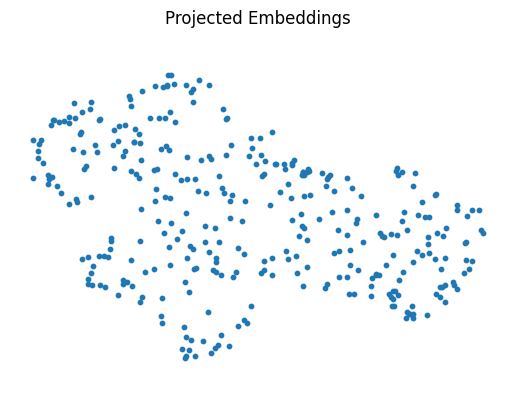

In [10]:
projected_dataset_embeddings = project_embedding(embeddings, umap_transform)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Expansion with generated answers

https://arxiv.org/abs/2305.03653

In [9]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

llm = ChatOpenAI(model="gpt-4o", temperature=0.5)

def augmented_quries(query):
    messages = [
        SystemMessage(content="You are a helpful expert financial research assistant. Provide an example answer to the given question, that might be found in a document like an annual report. "),
        HumanMessage(content=query),
    ]
    result = llm.invoke(messages)
    response = result.content
    return response

In [10]:
original_query = "Was there significant turnover in the executive team?"
hypothetical_answer = augmented_quries(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
print(joint_query)

Was there significant turnover in the executive team? In the fiscal year 2022, there was notable turnover in our executive team. Specifically, the company appointed a new Chief Financial Officer, Jane Doe, who succeeded John Smith following his retirement after 15 years of dedicated service. Additionally, we welcomed Emily Zhang as the Chief Marketing Officer, replacing Robert Brown, who left the company to pursue other opportunities. These changes are part of our ongoing strategy to bring in fresh perspectives and drive innovation in our operations. Both Jane and Emily bring a wealth of experience and leadership to their respective roles, and we are confident in their ability to contribute to our company’s growth and success.


In [14]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrived_documents = results['documents'][0]
retrived_embeddings = results['embeddings'][0]

for docs in retrived_documents:
    print(docs)
    print(" ")

NameError: name 'joint_query' is not defined

In [12]:
original_query_embedding = openai_ef([original_query])
augmented_query_embedding = openai_ef([joint_query])

projected_original_query_embedding = project_embedding(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embedding(augmented_query_embedding, umap_transform)
projected_retrieved_query_embedding = project_embedding(retrived_embeddings, umap_transform)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\de

NameError: name 'projected_retrieved_query_embedding' is not defined

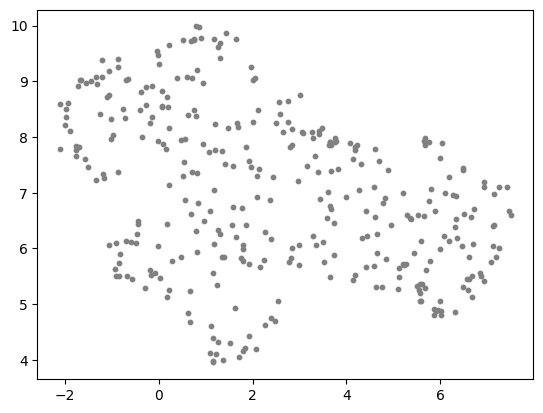

In [13]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_query_embedding[:, 0], projected_retrieved_query_embedding[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')


## Expansion with multiple queries

In [11]:
def augment_multiple_query(query):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Your users are asking questions about an annual report. "
            "Suggest up to five additional related questions to help them find the information they need, for the provided question. "
            "Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic."
            "Make sure they are complete questions, and that they are related to the original question."
            "Output one question per line. Do not number the questions."
        },
        {"role": "user", "content": query}
    ]

    result = llm.invoke(messages)
    response = result.content.split("\n")
    return response

In [12]:
original_query = "What were the most important factors that contributed to increases in revenue?"
augmented_queries = augment_multiple_query(original_query)

for query in augmented_queries:
    print(query)

NameError: name 'llm' is not defined

In [16]:
queries = [original_query] + augmented_queries

results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents']

# Duplicate the retrieved Document
unique_document = set()
for i, docs in enumerate(retrieved_documents):
    print(f"Query: {queries[i]}")
    for doc in docs:
        print(doc)
        print("")
        unique_document.add(doc)

Query: What were the most important factors that contributed to increases in revenue?
Segment revenue and operating income were as follows during the periods presented:  
  
(In millions)          
        
Year Ended June  30, 2023  2022  2021  
        
Revenue        
        
Productivity and Business Processes  $ 69,274   $ 63,364   $ 53,915   
Intelligent Cloud   87,907    74,965    59,728   
More Personal Computing   54,734    59,941    54,445         
Total  $  211,915   $  198,270   $  168,088           
  
Operating Income  
        
Productivity and Business Processes  $ 34,189   $ 29,690   $ 24,351   
Intelligent Cloud   37,884    33,203    26,471   
More Personal Computing   16,450    20,490    19,094         
Total  $ 88,523   $ 83,383   $ 69,916           
  
No sales to an individual customer or country other than the United States accounted for more than 10% of revenue for 
fiscal years 2023, 2022, or 2021. Revenue, classified by the major geographic areas in which our

In [17]:
original_query_embedding = openai_ef([original_query])
augmented_query_embeddings = openai_ef(augmented_queries)

project_original_query = project_embedding(original_query_embedding, umap_transform)
project_augmented_queries = project_embedding(augmented_query_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'for

In [18]:
result_embeddings = results['embeddings']
result_embeddings = [item for sublist in result_embeddings for item in sublist]
projected_result_embeddings = project_embedding(result_embeddings, umap_transform)


  0%|          | 0/30 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensur

(np.float64(-1.5440500319004058),
 np.float64(6.177488499879837),
 np.float64(2.400087559223175),
 np.float64(11.212962186336517))

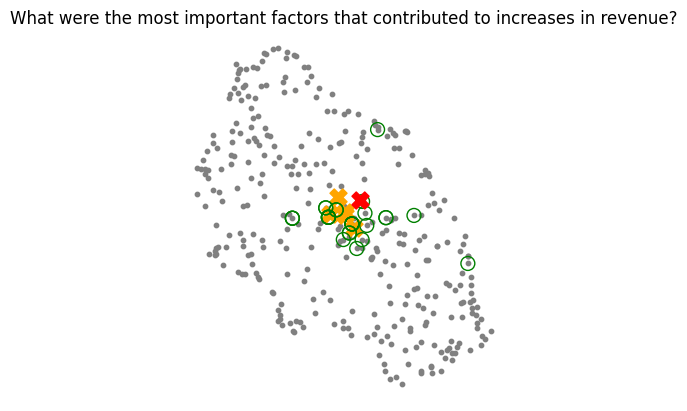

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(project_augmented_queries[:, 0], project_augmented_queries[:, 1], s=150, marker='X', color='orange')
plt.scatter(projected_result_embeddings[:, 0], projected_result_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(project_original_query[:, 0], project_original_query[:, 1], s=150, marker='X', color='r')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

In [22]:
def rag(query, retrieved_documents):
    information = retrieved_documents

    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Your users are asking questions about information contained in an annual report."
            "You will be shown the user's question, and the relevant information from the annual report. Answer the user's question using only this information."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = llm.invoke(messages)
    content = response.content
    return content

In [23]:
output = rag(query=original_query, retrieved_documents=retrieved_documents)

print(output)

The most important factors that contributed to increases in revenue were:

1. **Microsoft Cloud Growth**: Microsoft Cloud revenue increased by 22% to $111.6 billion, driven by significant growth in cloud services.

2. **Intelligent Cloud Segment**: Revenue in the Intelligent Cloud segment increased by $12.9 billion or 17%, primarily driven by a 29% growth in Azure and other cloud services.

3. **Productivity and Business Processes Segment**: Revenue in this segment increased due to a 10% growth in Office Commercial products and cloud services, with Office 365 Commercial revenue growing by 13%.

4. **LinkedIn and Dynamics**: LinkedIn revenue increased by 10%, and Dynamics products and cloud services revenue increased by 16%, with Dynamics 365 growing by 24%.

5. **Search and News Advertising**: Revenue excluding traffic acquisition costs increased by 11%, driven by higher search volume and the Xandr acquisition.

These factors highlight the company's strong performance in cloud services